In [1]:
!pip install git+https://github.com/netneurolab/neuromaps.git

  Cloning https://github.com/netneurolab/neuromaps.git to /private/var/folders/t2/8t74_04d3t5gx4vjqq895zbh0000gn/T/pip-req-build-if5lb715
  Running command git clone --filter=blob:none --quiet https://github.com/netneurolab/neuromaps.git /private/var/folders/t2/8t74_04d3t5gx4vjqq895zbh0000gn/T/pip-req-build-if5lb715
  Resolved https://github.com/netneurolab/neuromaps.git to commit f0ed67c44d633061b93c6d337a1b233f6895c408
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!source ~/.zshrc

In [2]:
!wb_command -version

Connectome Workbench
Type: Command Line Application
Version: 2.0.1
Qt Compiled Version: 6.2.3
Qt Runtime Version: 6.2.3
Commit: 150de12f4f4b94b39bec6d9133ad2e7019d2d3ef
Commit Date: 2024-10-15 17:38:41 -0500
Compiler: c++ (/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin)
Compiler Version: 13.0.0.13000029
Compiled Debug: NO
Operating System: Apple OSX
Compiled with OpenMP: YES


In [3]:
# pip install neuromaps nilearn matplotlib
from neuromaps import datasets, images
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
import pathlib
#fetcg surface data
surface_annotations = datasets.available_annotations(format='surface')
print(f'Available surface annotations: {len(surface_annotations)}')
print(surface_annotations)
example = datasets.fetch_annotation(source='margulies2016', desc='fcgradient10', space='fsLR', den='32k')

Available surface annotations: 39
[('abagen', 'genepc1', 'fsaverage', '10k'), ('beliveau2017', 'az10419369', 'fsaverage', '164k'), ('beliveau2017', 'cimbi36', 'fsaverage', '164k'), ('beliveau2017', 'cumi101', 'fsaverage', '164k'), ('beliveau2017', 'dasb', 'fsaverage', '164k'), ('beliveau2017', 'sb207145', 'fsaverage', '164k'), ('hcps1200', 'megalpha', 'fsLR', '4k'), ('hcps1200', 'megbeta', 'fsLR', '4k'), ('hcps1200', 'megdelta', 'fsLR', '4k'), ('hcps1200', 'meggamma1', 'fsLR', '4k'), ('hcps1200', 'meggamma2', 'fsLR', '4k'), ('hcps1200', 'megtheta', 'fsLR', '4k'), ('hcps1200', 'megtimescale', 'fsLR', '4k'), ('hcps1200', 'myelinmap', 'fsLR', '32k'), ('hcps1200', 'thickness', 'fsLR', '32k'), ('hill2010', 'devexp', 'fsLR', '164k'), ('hill2010', 'evoexp', 'fsLR', '164k'), ('margulies2016', 'fcgradient01', 'fsLR', '32k'), ('margulies2016', 'fcgradient02', 'fsLR', '32k'), ('margulies2016', 'fcgradient03', 'fsLR', '32k'), ('margulies2016', 'fcgradient04', 'fsLR', '32k'), ('margulies2016', 'fcg

/var/folders/t2/8t74_04d3t5gx4vjqq895zbh0000gn/T/ipykernel_89801/4004513898.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


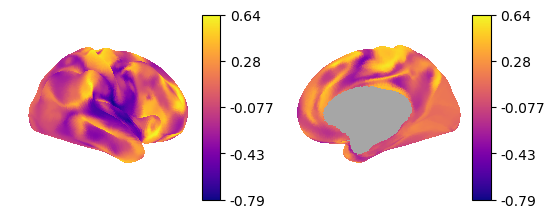

In [4]:
from neuromaps import plotting
fig = plotting.plot_surf_template(
    data=example,
    template='fsLR',
    density='32k',
    surf='inflated',          
    cmap='plasma',
    hemi='R',
    colorbar=True
)
fig.show()

In [6]:
main_map = datasets.fetch_annotation(source='hill2010', desc='evoexp', space='fsLR', den='164k')
datasets.describe_annotations(('hill2010', 'evoexp', 'fsLR', '164k'))
main_map


[References] Please cite the following papers if you are using this data:

  For {'source': 'hill2010', 'desc': 'evoexp', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    Jason Hill, Terrie Inder, Jeffrey Neil, Donna Dierker, John Harwell, and David Van Essen. Similar patterns of cortical expansion during human development and evolution. Proceedings of the National Academy of Sciences, 107(29):13135–13140, 2010.
  [secondary]:
    
1. ('hill2010', 'evoexp', 'fsLR', '164k') - Evolutionary cortical expansion
   N nan - Age None
   Primary references:
      (hill2010pnas) Jason Hill, Terrie Inder, Jeffrey Neil, Donna Dierker, John Harwell, and David Van Essen. Similar patterns of cortical expansion during human development and evolution. Proceedings of the National Academy of Sciences, 107(29):13135–13140, 2010.
   Secondary references:
      () 


'/Users/kevinhuang/neuromaps-data/annotations/hill2010/evoexp/fsLR/source-hill2010_desc-evoexp_space-fsLR_den-164k_hemi-R_feature.func.gii'

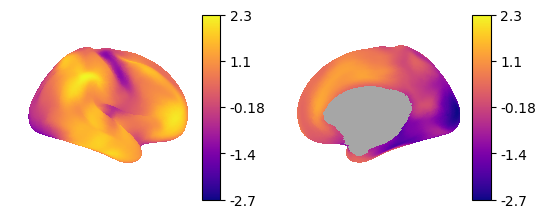

In [7]:
fig = plotting.plot_surf_template(
    data=main_map,
    template='fsLR',
    density='164k',
    surf='inflated',          
    cmap='plasma',
    hemi='R',
    colorbar=True
)

In [8]:
blood_volume = datasets.fetch_annotation(source='raichle', desc='cbv', space='fsLR', den='164k')
blood_volume


[References] Please cite the following papers if you are using this data:

  For {'source': 'raichle', 'desc': 'cbv', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    S Neil Vaishnavi, Andrei G Vlassenko, Melissa M Rundle, Abraham Z Snyder, Mark A Mintun, and Marcus E Raichle. Regional aerobic glycolysis in the human brain. Proceedings of the National Academy of Sciences, 107(41):17757–17762, 2010.
  [secondary]:
    


['/Users/kevinhuang/neuromaps-data/annotations/raichle/cbv/fsLR/source-raichle_desc-cbv_space-fsLR_den-164k_hemi-L_feature.func.gii',
 '/Users/kevinhuang/neuromaps-data/annotations/raichle/cbv/fsLR/source-raichle_desc-cbv_space-fsLR_den-164k_hemi-R_feature.func.gii']

In [ ]:
#compare the expansion map to the right hemi of target
from neuromaps.stats import compare_images
from neuromaps import resampling
target_map = blood_volume[1]
corr = compare_images(main_map, blood_volume[1], metric='pearsonr')
print(f'r = {corr:.3f}')

r = -0.367


In [ ]:
from neuromaps import nulls, stats, images
import nibabel as nib
src = main_map           # right-hemisphere evoexp (Hill2010)
trg = blood_volume[1]    # right-hemisphere CBV (Raichle)

#Resample
src32, trg32 = resampling.resample_images(
    src=src,
    trg=trg,
    src_space='fsLR',
    trg_space='fsLR',
    hemi='R',
    method='linear',
    resampling='transform_to_alt',
    alt_spec=('fsLR', '164k')
)
src_R = images.load_data(src32)
trg_R = images.load_data(trg32)
print(f"Source map shape in 164k: {src_R.shape}")
print(f"Target map shape in 164k: {trg_R.shape}")

Source map shape in 164k: (163842,)
Target map shape in 164k: (163842,)


In [ ]:
L_nan_src = np.full_like(src_R, np.nan)
L_nan_trg = np.full_like(trg_R, np.nan)

src_bi = np.hstack([L_nan_src, src_R])
trg_bi = np.hstack([L_nan_trg, trg_R])

#Spin nulls on the same atlas+density as the arrays represent
rotated = nulls.alexander_bloch(
    data=src_bi,
    atlas='fsLR',
    density='164k',
    n_perm=1000,
    seed=1234
)

#Compare
r, p = stats.compare_images(src_bi, trg_bi, metric='pearsonr', nulls=rotated)
print(f"r = {r:.3f}, p_spin = {p:.4f}")

r = -0.367, p_spin = 0.0030
